## Homework #4. Exploratory Data Analysis
#### Author: `Yelyzaveta Zhyvitska`
#### Total time spent on h/w (in minutes): `2880`

# Data Preparation

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
channels_data = []

In [3]:
# Open the JSON file
with open('channels_list.json', 'r') as file:
    # Load the JSON data
    data = json.load(file)

channel_names = data['names']

In [4]:
for name in channel_names:
    path = f'./channels/{name}.csv'
    data = pd.read_csv(path, low_memory=False)
    channels_data.append({'name': name, 'data': data})

In [5]:
'Channels Count:', len(channels_data)

('Channels Count:', 300)

In [6]:
channels_data[0]['name'], channels_data[0]['data'].head(10) 

('rian_ru',
    Unnamed: 0      id                       date     views  reactions  \
 0           0  189123  2022-12-19 09:56:04+00:00   98413.0        NaN   
 1           1  189122  2022-12-19 09:51:57+00:00  120179.0        NaN   
 2           2  189121  2022-12-19 09:51:57+00:00  116172.0        NaN   
 3           3  189120  2022-12-19 09:51:57+00:00  115171.0        NaN   
 4           4  189119  2022-12-19 09:51:57+00:00  118174.0        NaN   
 5           5  189118  2022-12-19 09:10:44+00:00  227994.0        NaN   
 6           6  189117  2022-12-19 09:10:44+00:00  224975.0        NaN   
 7           7  189116  2022-12-19 09:09:39+00:00  226171.0        NaN   
 8           8  189115  2022-12-19 08:50:57+00:00  256663.0        NaN   
 9           9  189114  2022-12-19 08:48:26+00:00  259661.0        NaN   
 
                                 to_id fwd_from  \
 0  PeerChannel(channel_id=1101170442)      NaN   
 1  PeerChannel(channel_id=1101170442)      NaN   
 2  PeerChannel(cha

In [7]:
channels_data[0]['data'].columns

Index(['Unnamed: 0', 'id', 'date', 'views', 'reactions', 'to_id', 'fwd_from',
       'message', 'type', 'duration'],
      dtype='object')

In [8]:
merged_data = pd.DataFrame()
for channel in channels_data:
    data = channel['data']
    name = channel['name']
    data['name'] = name
    merged_data = pd.concat([merged_data, data], ignore_index=True)

# Convert 'timestamp' column to datetime type
merged_data['date'] = pd.to_datetime(merged_data['date'], errors='coerce')

In [9]:
merged_data.head(10)

,Unnamed: 0,id,date,views,reactions,to_id,fwd_from,message,type,duration,name,frw_from_title,frw_from_name,msg_entity
0,0,189123.0,2022-12-19 09:56:04+00:00,98413.0,NaN,PeerChannel(channel_id=1101170442),NaN,ФТС России ожидает роста товарооборота с Китае...,text,NaN,rian_ru,NaN,NaN,NaN
1,1,189122.0,2022-12-19 09:51:57+00:00,120179.0,NaN,PeerChannel(channel_id=1101170442),NaN,NaN,photo,NaN,rian_ru,NaN,NaN,NaN
2,2,189121.0,2022-12-19 09:51:57+00:00,116172.0,NaN,PeerChannel(channel_id=1101170442),NaN,NaN,video,12.0,rian_ru,NaN,NaN,NaN
3,3,189120.0,2022-12-19 09:51:57+00:00,115171.0,NaN,PeerChannel(channel_id=1101170442),NaN,NaN,photo,NaN,rian_ru,NaN,NaN,NaN
4,4,189119.0,2022-12-19 09:51:57+00:00,118174.0,NaN,PeerChannel(channel_id=1101170442),NaN,Буэнос-Айрес наутро после праздника,video,10.0,rian_ru,NaN,NaN,NaN
5,5,189118.0,2022-12-19 09:10:44+00:00,227994.0,NaN,PeerChannel(channel_id=1101170442),NaN,NaN,photo,NaN,rian_ru,NaN,NaN,NaN
6,6,189117.0,2022-12-19 09:10:44+00:00,224975.0,NaN,PeerChannel(channel_id=1101170442),NaN,"В СК сообщили, что жизни рабочих, пострадавших...",photo,NaN,rian_ru,NaN,NaN,NaN
7,7,189116.0,2022-12-19 09:09:39+00:00,226171.0,NaN,PeerChannel(channel_id=1101170442),NaN,Самолет с пострадавшим при покушении главой Ру...,video,30.0,rian_ru,NaN,NaN,NaN
8,8,189115.0,2022-12-19 08:50:57+00:00,256663.0,NaN,PeerChannel(channel_id=1101170442),NaN,Норвежский король Харальд V (85 лет) госпитали...,text,NaN,rian_ru,NaN,NaN,NaN
9,9,189114.0,2022-12-19 08:48:26+00:00,259661.0,NaN,PeerChannel(channel_id=1101170442),NaN,В подмосковном Краснознаменске 10 рабочих пост...,text,NaN,rian_ru,NaN,NaN,NaN


In [80]:
len(merged_data)

8108693

In [10]:
merged_data_2016 = merged_data[merged_data['date'].dt.year == 2016]
merged_data_2017 = merged_data[merged_data['date'].dt.year == 2017]
merged_data_2018 = merged_data[merged_data['date'].dt.year == 2018]
merged_data_2019 = merged_data[merged_data['date'].dt.year == 2019]
merged_data_2020 = merged_data[merged_data['date'].dt.year == 2020]
merged_data_2021 = merged_data[merged_data['date'].dt.year == 2021]
merged_data_2022 = merged_data[merged_data['date'].dt.year == 2022]

## The most popular channels

In [11]:
get_N_popular_channels = 10

In [12]:
channel_views = merged_data.groupby('name')['views'].sum().reset_index()
channel_views = channel_views.sort_values(by='views', ascending=False)
channel_views_most_popular = channel_views.head(get_N_popular_channels)
channel_views_most_popular = channel_views_most_popular.sort_values(by='views')

In [13]:
channel_views_2016 = merged_data_2016.groupby('name')['views'].sum().reset_index()
channel_views_2016 = channel_views_2016.sort_values(by='views', ascending=False)
channel_views_2016_most_popular = channel_views_2016.head(get_N_popular_channels)
channel_views_2016_most_popular = channel_views_2016_most_popular.sort_values(by='views')

In [14]:
channel_views_2017 = merged_data_2017.groupby('name')['views'].sum().reset_index()
channel_views_2017 = channel_views_2017.sort_values(by='views', ascending=False)
channel_views_2017_most_popular = channel_views_2017.head(get_N_popular_channels)
channel_views_2017_most_popular = channel_views_2017_most_popular.sort_values(by='views')

In [15]:
channel_views_2018 = merged_data_2018.groupby('name')['views'].sum().reset_index()
channel_views_2018 = channel_views_2018.sort_values(by='views', ascending=False)
channel_views_2018_most_popular = channel_views_2018.head(get_N_popular_channels)
channel_views_2018_most_popular = channel_views_2018_most_popular.sort_values(by='views')

In [16]:
channel_views_2019 = merged_data_2019.groupby('name')['views'].sum().reset_index()
channel_views_2019 = channel_views_2019.sort_values(by='views', ascending=False)
channel_views_2019_most_popular = channel_views_2019.head(get_N_popular_channels)
channel_views_2019_most_popular = channel_views_2019_most_popular.sort_values(by='views')

In [17]:
channel_views_2020 = merged_data_2020.groupby('name')['views'].sum().reset_index()
channel_views_2020 = channel_views_2020.sort_values(by='views', ascending=False)
channel_views_2020_most_popular = channel_views_2020.head(get_N_popular_channels)
channel_views_2020_most_popular = channel_views_2020_most_popular.sort_values(by='views')

In [18]:
channel_views_2021 = merged_data_2021.groupby('name')['views'].sum().reset_index()
channel_views_2021 = channel_views_2021.sort_values(by='views', ascending=False)
channel_views_2021_most_popular = channel_views_2021.head(get_N_popular_channels)
channel_views_2021_most_popular = channel_views_2021_most_popular.sort_values(by='views')

In [19]:
channel_views_2022 = merged_data_2022.groupby('name')['views'].sum().reset_index()
channel_views_2022 = channel_views_2022.sort_values(by='views', ascending=False)
channel_views_2022_most_popular = channel_views_2022.head(get_N_popular_channels)
channel_views_2022_most_popular = channel_views_2022_most_popular.sort_values(by='views')

In [20]:
from matplotlib.colors import ListedColormap
import seaborn as sns
# Use the 'category10' color cycle for unique colors
name_colors = dict(zip(channel_names, sns.color_palette('deep', n_colors=len(channel_names))))

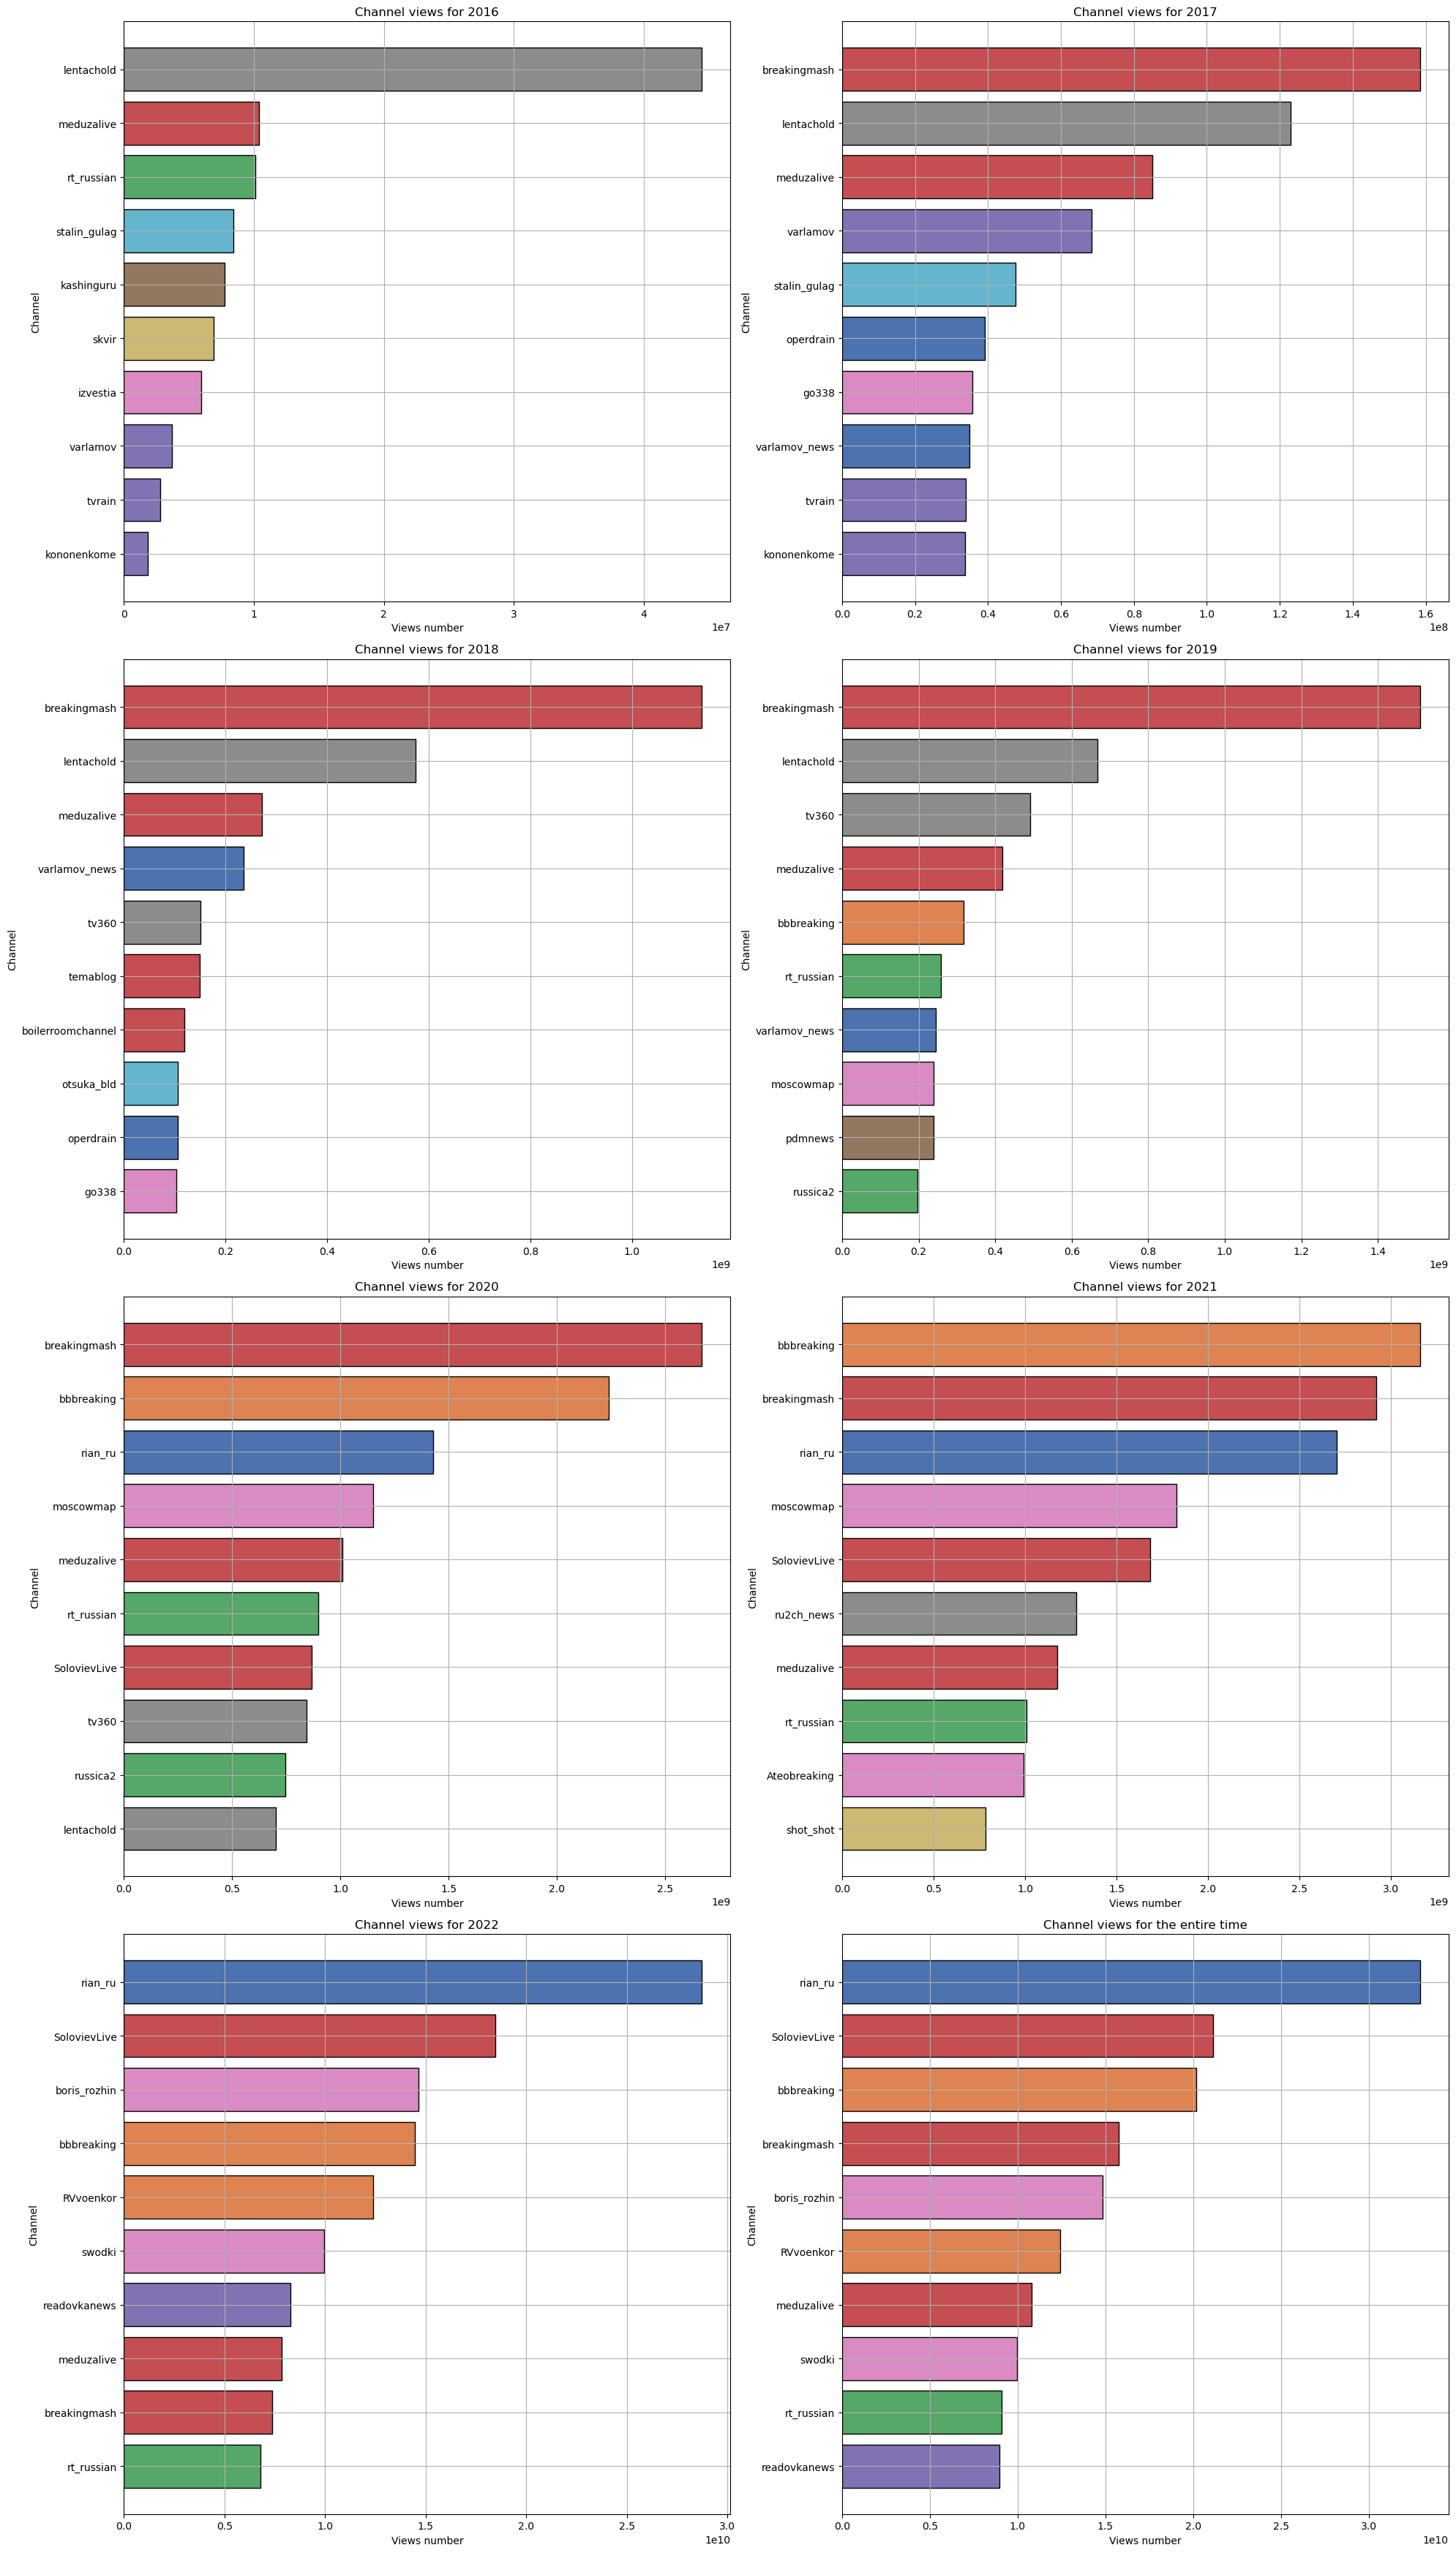

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 35))

axes[0,0].barh(channel_views_2016_most_popular['name'], channel_views_2016_most_popular['views'], color=channel_views_2016_most_popular['name'].map(name_colors), edgecolor='black')
axes[0,0].set_xlabel('Views number')
axes[0,0].set_ylabel('Channel')
axes[0,0].set_title('Channel views for 2016')
axes[0,0].grid(True)

axes[0,1].barh(channel_views_2017_most_popular['name'], channel_views_2017_most_popular['views'], color=channel_views_2017_most_popular['name'].map(name_colors), edgecolor='black')
axes[0,1].set_xlabel('Views number')
axes[0,1].set_ylabel('Channel')
axes[0,1].set_title('Channel views for 2017')
axes[0,1].grid(True)

axes[1,0].barh(channel_views_2018_most_popular['name'], channel_views_2018_most_popular['views'], color=channel_views_2018_most_popular['name'].map(name_colors), edgecolor='black')
axes[1,0].set_xlabel('Views number')
axes[1,0].set_ylabel('Channel')
axes[1,0].set_title('Channel views for 2018')
axes[1,0].grid(True)

axes[1,1].barh(channel_views_2019_most_popular['name'], channel_views_2019_most_popular['views'], color=channel_views_2019_most_popular['name'].map(name_colors), edgecolor='black')
axes[1,1].set_xlabel('Views number')
axes[1,1].set_ylabel('Channel')
axes[1,1].set_title('Channel views for 2019')
axes[1,1].grid(True)

axes[2,0].barh(channel_views_2020_most_popular['name'], channel_views_2020_most_popular['views'], color=channel_views_2020_most_popular['name'].map(name_colors), edgecolor='black')
axes[2,0].set_xlabel('Views number')
axes[2,0].set_ylabel('Channel')
axes[2,0].set_title('Channel views for 2020')
axes[2,0].grid(True)

axes[2,1].barh(channel_views_2021_most_popular['name'], channel_views_2021_most_popular['views'], color=channel_views_2021_most_popular['name'].map(name_colors), edgecolor='black')
axes[2,1].set_xlabel('Views number')
axes[2,1].set_ylabel('Channel')
axes[2,1].set_title('Channel views for 2021')
axes[2,1].grid(True)

axes[3,0].barh(channel_views_2022_most_popular['name'], channel_views_2022_most_popular['views'], color=channel_views_2022_most_popular['name'].map(name_colors), edgecolor='black')
axes[3,0].set_xlabel('Views number')
axes[3,0].set_ylabel('Channel')
axes[3,0].set_title('Channel views for 2022')
axes[3,0].grid(True)

axes[3,1].barh(channel_views_most_popular['name'], channel_views_most_popular['views'], color=channel_views_most_popular['name'].map(name_colors), edgecolor='black')
axes[3,1].set_xlabel('Views number')
axes[3,1].set_ylabel('Channel')
axes[3,1].set_title('Channel views for the entire time')
axes[3,1].grid(True)

plt.tight_layout()

# Show the plot
plt.show()

## Popularity of channels through the years

In [22]:
# Group by 'name' and resample views per 6 months
merged_data_grouped = merged_data.groupby(['name', pd.Grouper(key='date', freq='6M')])['views'].sum().reset_index()

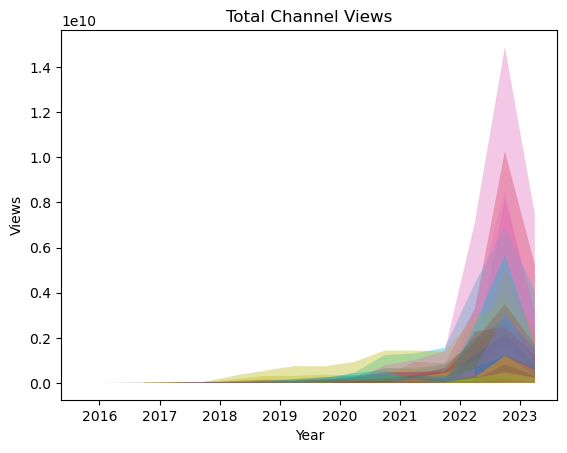

In [23]:
for name, group in merged_data_grouped.groupby('name'):
    plt.fill_between(group['date'], group['views'], alpha=0.4)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Views')
plt.title('Total Channel Views')

# Show the plot
plt.show()

## Channel Existanse Durations

In [24]:
df_duration = merged_data.groupby('name').agg(min_date=('date', 'min'), max_date=('date', 'max')).reset_index()
df_duration['duration'] = (df_duration['max_date'] - df_duration['min_date']).dt.days / 365.25
df_duration = df_duration.sort_values(by='duration', ascending=False)
df_duration_longer = df_duration.head(20)
df_duration_longer = df_duration_longer.sort_values(by='duration')
df_duration_shorter = df_duration.tail(20)
# df_duration_shorter = df_duration_shorter.sort_values(by='duration')

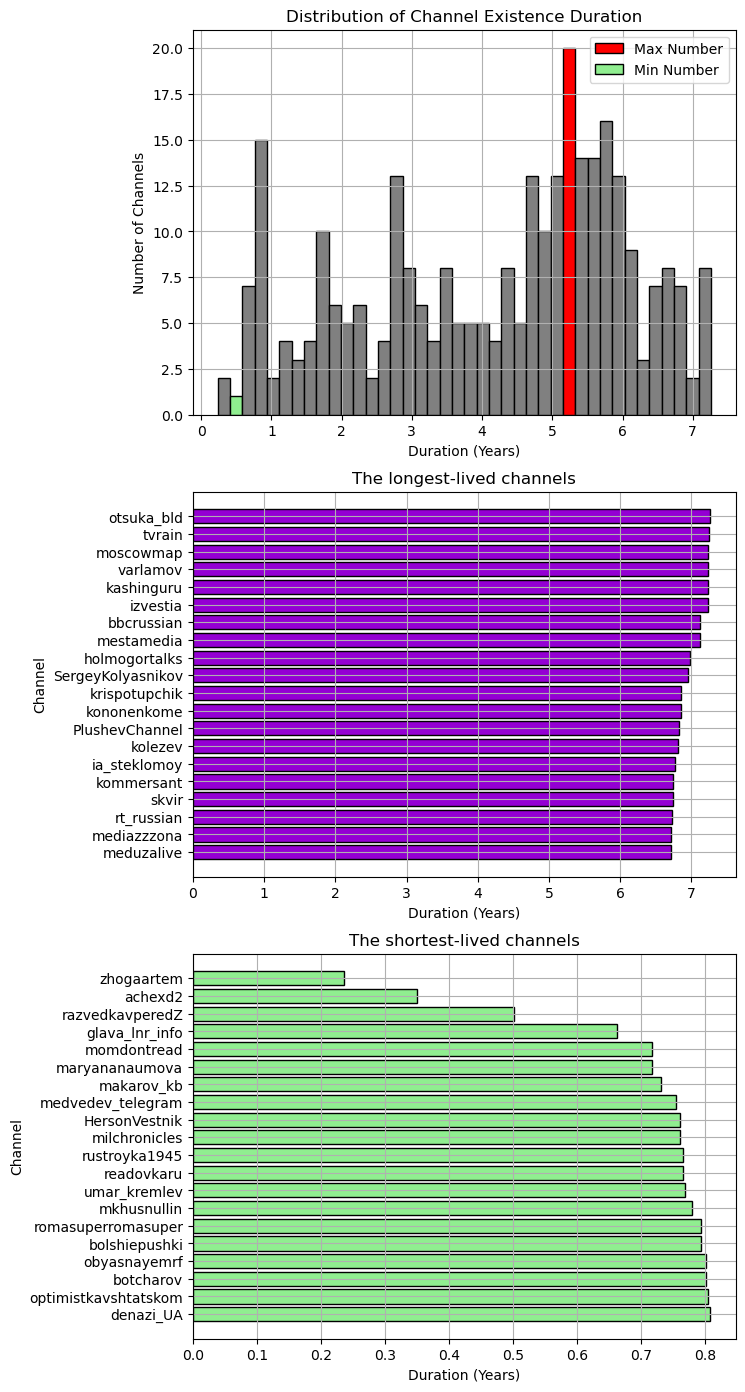

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7, 17))

hist = ax[0].hist(df_duration['duration'], bins=40, color='gray', edgecolor='black')

# Highlight max and min duration channels
max_bin = np.argmax(hist[0])
min_bin = np.argmin(hist[0])
max_patch = ax[0].patches[max_bin]
min_patch = ax[0].patches[min_bin]

ax[0].patches[max_bin].set_facecolor('red')
ax[0].patches[min_bin].set_facecolor('lightgreen')

ax[0].set_xlabel('Duration (Years)')
ax[0].set_ylabel('Number of Channels')
ax[0].set_title('Distribution of Channel Existence Duration')
ax[0].grid(True)

# Define legend handles
handles = [max_patch, min_patch]
labels = ['Max Number', 'Min Number']
ax[0].legend(handles, labels)

ax[1].barh(df_duration_longer['name'], df_duration_longer['duration'], color='darkviolet', edgecolor='black')
ax[1].set_xlabel('Duration (Years)')
ax[1].set_ylabel('Channel')
ax[1].set_title('The longest-lived channels')
ax[1].grid(True)

ax[2].barh(df_duration_shorter['name'], df_duration_shorter['duration'], color='lightgreen', edgecolor='black')
ax[2].set_xlabel('Duration (Years)')
ax[2].set_ylabel('Channel')
ax[2].set_title('The shortest-lived channels')
ax[2].grid(True)

## 2.  Creation Channel Dates

In [26]:
df_creation_date = merged_data.groupby('name').agg(creation_date=('date', 'min')).reset_index()
df_creation_date = df_creation_date.sort_values(by='creation_date', ascending=False)
df_creation_date_first = df_creation_date.head(20)
df_creation_date_first = df_creation_date_first.sort_values(by='creation_date')

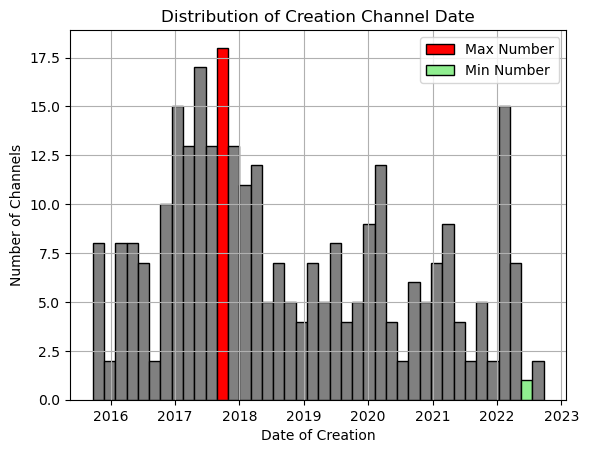

In [27]:
fig, ax1 = plt.subplots()

hist = ax1.hist(df_creation_date['creation_date'], bins=40, color='gray', edgecolor='black')

# Highlight max and min duration channels
max_bin = np.argmax(hist[0])
min_bin = np.argmin(hist[0])
max_patch = ax1.patches[max_bin]
min_patch = ax1.patches[min_bin]
ax1.patches[max_bin].set_facecolor('red')
ax1.patches[min_bin].set_facecolor('lightgreen')

ax1.set_xlabel('Date of Creation')
ax1.set_ylabel('Number of Channels')
ax1.set_title('Distribution of Creation Channel Date')
# Define legend handles
handles = [max_patch, min_patch]
labels = ['Max Number', 'Min Number']
ax1.legend(handles, labels)
plt.grid(True)

## 3. Frequency of using 'Azov' in messages 

In [28]:
df_freq_using_azov = pd.DataFrame(merged_data)
df_freq_using_azov['year'] = df_freq_using_azov['date'].dt.year
df_freq_using_azov['count'] = df_freq_using_azov['message'].astype(str).str.lower().str.count('азов')

In [29]:
df_freq_using_azov.sample(n=10, random_state=42)

,Unnamed: 0,id,date,views,reactions,to_id,fwd_from,message,type,duration,name,frw_from_title,frw_from_name,msg_entity,year,count
3177615,43463,18191.0,2021-02-04 23:20:01+00:00,21756.0,NaN,PeerChannel(channel_id=1213234440),NaN,«Навальный должен быть немедленно освобожден»:...,text,NaN,rtvimain,NaN,NaN,NaN,2021,0
1822442,15640,99522.0,2022-08-08 18:32:11+00:00,21546.0,NaN,PeerChannel(channel_id=1003698528),NaN,NaN,video,12.0,izvestia,NaN,NaN,NaN,2022,0
1255458,59972,41326.0,2020-08-30 12:12:22+00:00,59134.0,NaN,PeerChannel(channel_id=1046446760),"MessageFwdHeader(date=datetime.datetime(2020, ...",Корреспондент «Говорит Москва» рассказал о веж...,photo,NaN,tv360,NaN,NaN,NaN,2020,0
520962,14805,7184932.0,2022-11-11 20:40:42+00:00,NaN,MessageReactions(results=[ReactionCount(reacti...,PeerChannel(channel_id=1366415996),NaN,Какая Италия? В Болгарию всех,text,NaN,readovkanews,NaN,NaN,NaN,2022,0
2304949,142472,301142.0,2021-08-11 07:42:49+00:00,6147.0,NaN,PeerChannel(channel_id=1082084045),"MessageFwdHeader(date=datetime.datetime(2021, ...","Маршрутный автобус загорелся на ""Соколе"". По п...",photo,NaN,karaulny,NaN,NaN,NaN,2021,0
2597333,434856,707.0,2017-01-30 10:10:45+00:00,2590.0,NaN,PeerChannel(channel_id=1082084045),NaN,Безо всякого алармизма и антиамериканизма.\n\n...,photo,NaN,karaulny,NaN,NaN,NaN,2017,0
2567458,404981,31210.0,2017-11-16 11:45:38+00:00,9460.0,NaN,PeerChannel(channel_id=1082084045),NaN,"🔥 #нампишут, что по неофициальной статистике Ф...",text,NaN,karaulny,NaN,NaN,NaN,2017,0
2393955,231478,209622.0,2020-05-12 13:44:48+00:00,2.0,NaN,PeerChannel(channel_id=1082084045),"MessageFwdHeader(date=datetime.datetime(2020, ...",Брифинг вице-премьера РФ Татьяны Голиковой и г...,text,NaN,karaulny,NaN,NaN,NaN,2020,0
66768,66768,122130.0,2021-09-27 12:58:46+00:00,50495.0,NaN,PeerChannel(channel_id=1101170442),NaN,"Россиянин погиб, спасая девушку, упавшую в мор...",video,164.0,rian_ru,NaN,NaN,NaN,2021,0
3988706,23818,32428.0,2020-07-11 18:25:02+00:00,102398.0,NaN,PeerChannel(channel_id=1059815658),NaN,"Вечерние ""хроники коронавируса""\n\n▪️На выплат...",photo,NaN,lentachold,NaN,NaN,NaN,2020,0


In [30]:
len(df_freq_using_azov)

8108693

In [31]:
merged_df_freq_using_azov = df_freq_using_azov.groupby('year').agg({'count': 'sum'}).reset_index()

In [32]:
len(merged_df_freq_using_azov)

8

In [33]:
merged_df_freq_using_azov

,year,count
0,2015,37
1,2016,688
2,2017,4815
3,2018,11837
4,2019,20993
5,2020,32907
6,2021,51836
7,2022,146822


In [34]:
sorted_df_freq_using_azov = merged_df_freq_using_azov.sort_values(by='year')

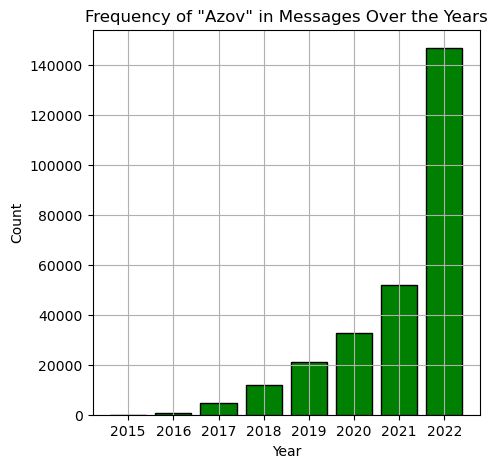

In [82]:
# Create a plot
plt.figure(figsize=(5, 5))
plt.bar(sorted_df_freq_using_azov['year'], sorted_df_freq_using_azov['count'], color='green', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Frequency of "Azov" in Messages Over the Years')
plt.grid(True)

In [36]:
merged_df_freq_using_azov1 = df_freq_using_azov.groupby(['name', 'year']).agg({'count': 'sum'}).reset_index()

In [37]:
merged_df_freq_using_azov1

,name,year,count
0,ASGasparyan,2017,4
1,ASGasparyan,2018,7
2,ASGasparyan,2019,34
3,ASGasparyan,2020,60
4,ASGasparyan,2021,67
...,...,...,...
1350,zvezdanews,2018,41
1351,zvezdanews,2019,48
1352,zvezdanews,2020,244
1353,zvezdanews,2021,270


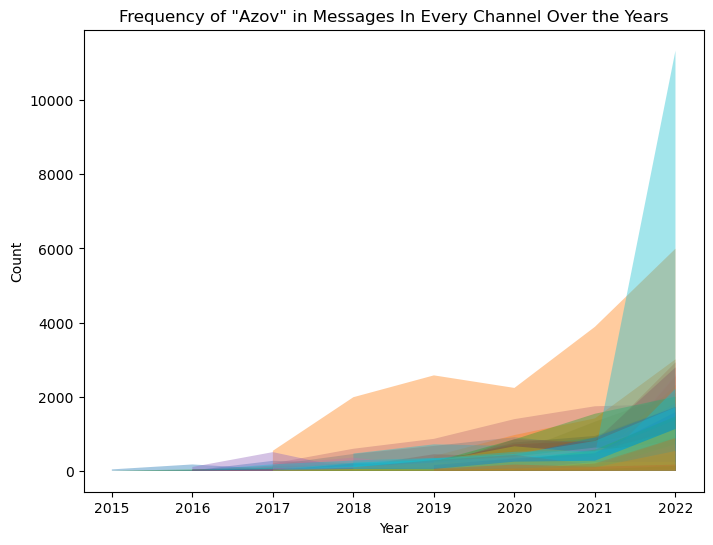

In [85]:
plt.figure(figsize=(8, 6))
for name, group in merged_df_freq_using_azov1.groupby('name'):
    plt.fill_between(group['year'], group['count'], label=name, alpha=0.4)
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Frequency of "Azov" in Messages In Every Channel Over the Years')

## 4. Frequency of using 'Ukraine' in messages 

In [39]:
df_freq_using_ukraine = pd.DataFrame(merged_data)
df_freq_using_ukraine['year'] = df_freq_using_ukraine['date'].dt.year
df_freq_using_ukraine['count'] = df_freq_using_ukraine['message'].astype(str).str.lower().str.count('украин')

In [40]:
df_freq_using_ukraine = df_freq_using_ukraine[df_freq_using_ukraine['count'] != 0]

In [41]:
df_freq_using_ukraine.sample(n=10, random_state=42)

,Unnamed: 0,id,date,views,reactions,to_id,fwd_from,message,type,duration,name,frw_from_title,frw_from_name,msg_entity,year,count
3961206,192200,3934.0,2021-07-12 07:50:43+00:00,1817.0,NaN,PeerChannel(channel_id=1144180066),NaN,"Тот факт, что на календаре православный праздн...",photo,NaN,swodki,NaN,NaN,NaN,2021,1
1599943,13767,61836.0,2022-06-10 06:22:40+00:00,232869.0,NaN,PeerChannel(channel_id=1036240821),NaN,Первые полосы британских газет посвящены смерт...,photo,NaN,meduzalive,NaN,NaN,NaN,2022,1
1445279,5307,84308.0,2022-09-29 08:47:34+00:00,70594.0,NaN,PeerChannel(channel_id=1111348665),NaN,"В Австралии, пока еще в научной среде, стали р...",photo,NaN,infantmilitario,NaN,NaN,NaN,2022,1
4910834,6461,62237.0,2022-07-26 14:18:07+00:00,13367.0,NaN,PeerChannel(channel_id=1418299591),"MessageFwdHeader(date=datetime.datetime(2022, ...",В самопровозглашенной ЛНР заявили о взятии под...,text,NaN,truth_aggregator,NaN,NaN,NaN,2022,3
6376745,36774,35213.0,2022-03-22 08:12:16+00:00,198881.0,MessageReactions(results=[ReactionCount(reacti...,PeerChannel(channel_id=1101806611),"MessageFwdHeader(date=datetime.datetime(2022, ...",⚡️Эксклюзив RT\n\nКадры опроса пленных украинс...,video,107.0,boris_rozhin,NaN,NaN,NaN,2022,1
6656252,4526,5559.0,2022-02-04 11:58:57+00:00,9981.0,NaN,PeerChannel(channel_id=1263569229),NaN,Хотя я сам весьма скептически отношусь к борот...,text,NaN,vysokygovorit,NaN,NaN,NaN,2022,3
2899032,17143,16827.0,2022-06-16 14:36:35+00:00,7271.0,MessageReactions(results=[ReactionCount(reacti...,PeerChannel(channel_id=1223185389),NaN,🤷🏻‍♂️ Байден попросил своих подчиненных не зах...,text,NaN,smotri_media,NaN,NaN,NaN,2022,1
2757116,9242,29749.0,2022-06-07 14:27:27+00:00,92583.0,NaN,PeerChannel(channel_id=1003921752),NaN,"Зеленский рассказал, почему Украина не может п...",text,NaN,bbcrussian,NaN,NaN,NaN,2022,9
5201096,1194,3055.0,2022-08-11 15:02:20+00:00,86936.0,MessageReactions(results=[ReactionCount(reacti...,PeerChannel(channel_id=1324060080),NaN,В догонку поста об отмене шенгенских виз для р...,text,NaN,olegtsarov,NaN,NaN,NaN,2022,1
6725905,19136,25471.0,2022-03-17 09:03:03+00:00,40224.0,MessageReactions(results=[ReactionCount(reacti...,PeerChannel(channel_id=1012103617),"MessageFwdHeader(date=datetime.datetime(2022, ...",Минобороны России опубликовало кадры уничтожен...,video,12.0,SergeyKolyasnikov,NaN,NaN,NaN,2022,1


In [42]:
merged_df_freq_using_ukraine = df_freq_using_ukraine.groupby('year').agg({'count': 'sum'}).reset_index()

In [43]:
merged_df_freq_using_ukraine

,year,count
0,2015,238
1,2016,3037
2,2017,15244
3,2018,32559
4,2019,73640
5,2020,76506
6,2021,165202
7,2022,1252952


In [44]:
sorted_df_freq_using_ukraine = merged_df_freq_using_ukraine.sort_values(by='year')

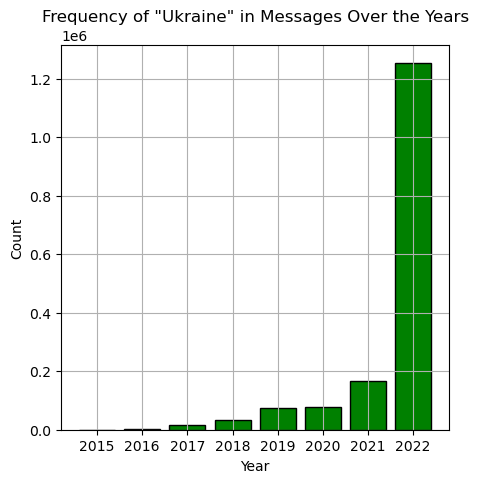

In [83]:
# Create a plot
plt.figure(figsize=(5, 5))
plt.bar(sorted_df_freq_using_ukraine['year'], sorted_df_freq_using_ukraine['count'], color='green', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Frequency of "Ukraine" in Messages Over the Years')
plt.grid(True)

In [46]:
merged_df_freq_using_ukraine1 = df_freq_using_ukraine.groupby(['name', 'year']).agg({'count': 'sum'}).reset_index()

In [47]:
merged_df_freq_using_ukraine1

,name,year,count
0,ASGasparyan,2017,26
1,ASGasparyan,2018,40
2,ASGasparyan,2019,318
3,ASGasparyan,2020,599
4,ASGasparyan,2021,500
...,...,...,...
1247,zvezdanews,2018,496
1248,zvezdanews,2019,421
1249,zvezdanews,2020,410
1250,zvezdanews,2021,848


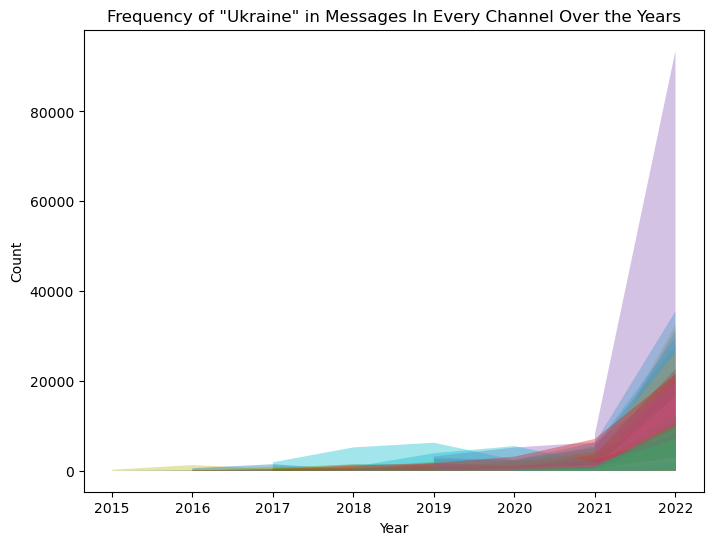

In [84]:
plt.figure(figsize=(8, 6))
for name, group in merged_df_freq_using_ukraine1.groupby('name'):
    plt.fill_between(group['year'], group['count'], alpha=0.4)
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Frequency of "Ukraine" in Messages In Every Channel Over the Years')

In [49]:
df_freq_using_lnr = pd.DataFrame(merged_data)
df_freq_using_lnr['year'] = df_freq_using_lnr['date'].dt.year
df_freq_using_lnr['count'] = df_freq_using_lnr['message'].astype(str).str.lower().str.count('лнр')

In [50]:
df_freq_using_bnr = pd.DataFrame(merged_data)
df_freq_using_bnr['year'] = df_freq_using_bnr['date'].dt.year
df_freq_using_bnr['count'] = df_freq_using_bnr['message'].astype(str).str.lower().str.count('бнр')

In [51]:
df_freq_using_lnr = df_freq_using_lnr[df_freq_using_lnr['count'] != 0]
df_freq_using_bnr = df_freq_using_bnr[df_freq_using_bnr['count'] != 0]

In [52]:
merged_df_freq_using_lnr = df_freq_using_lnr.groupby('year').agg({'count': 'sum'}).reset_index()
merged_df_freq_using_bnr = df_freq_using_bnr.groupby('year').agg({'count': 'sum'}).reset_index()

In [53]:
sorted_df_freq_using_lnr = merged_df_freq_using_lnr.sort_values(by='year')
sorted_df_freq_using_bnr = merged_df_freq_using_bnr.sort_values(by='year')

In [54]:
df_freq_using_donbass = pd.DataFrame(merged_data)
df_freq_using_donbass['year'] = df_freq_using_donbass['date'].dt.year
df_freq_using_donbass['count'] = df_freq_using_donbass['message'].astype(str).str.lower().str.count('донбасс')
df_freq_using_donbass = df_freq_using_donbass[df_freq_using_donbass['count'] != 0]
merged_df_freq_using_donbass = df_freq_using_donbass.groupby('year').agg({'count': 'sum'}).reset_index()
sorted_df_freq_using_donbass = merged_df_freq_using_donbass.sort_values(by='year')

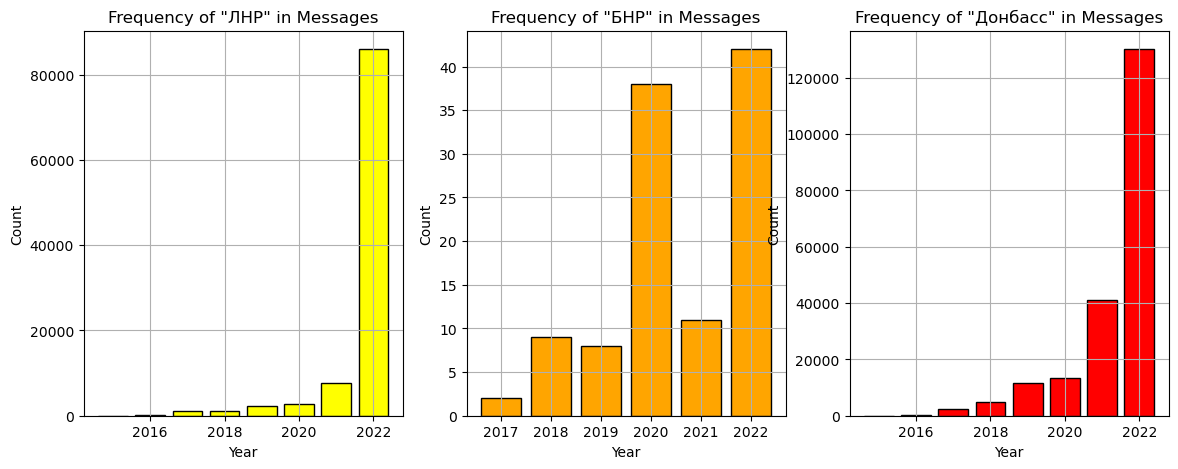

In [55]:
fig, ax2 = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

ax2[0].bar(sorted_df_freq_using_lnr['year'], sorted_df_freq_using_lnr['count'], color='yellow', edgecolor='black')
ax2[0].set_xlabel('Year')
ax2[0].set_ylabel('Count')
ax2[0].set_title('Frequency of "ЛНР" in Messages')
ax2[0].grid(True)

ax2[1].bar(sorted_df_freq_using_bnr['year'], sorted_df_freq_using_bnr['count'], color='orange', edgecolor='black')
ax2[1].set_xlabel('Year')
ax2[1].set_ylabel('Count')
ax2[1].set_title('Frequency of "БНР" in Messages')
ax2[1].grid(True)

ax2[2].bar(sorted_df_freq_using_donbass['year'], sorted_df_freq_using_donbass['count'], color='red', edgecolor='black')
ax2[2].set_xlabel('Year')
ax2[2].set_ylabel('Count')
ax2[2].set_title('Frequency of "Донбасс" in Messages')
ax2[2].grid(True)

## 2-gram words analysis

In [56]:
import nltk
import re

In [57]:
data_2022 = pd.DataFrame(merged_data)

In [58]:
# Filter the DataFrame for the year 2022
data_2022 = data_2022[data_2022['date'].dt.year == 2022]

In [59]:
len(merged_data)

8108693

In [60]:
len(data_2022)

3374025

In [61]:
num_parts = 10

# Calculate the number of rows in each part
rows_per_part = len(data_2022) // num_parts

# Slice the DataFrame into equal parts
slices = [data_2022.iloc[i*rows_per_part: (i+1)*rows_per_part] for i in range(num_parts)]

In [62]:
from nltk.util import bigrams
from collections import Counter

def text_to_bigrams(text):
    # Split text into words
    words = text.split()

    # Generate bigrams and store them in a list
    bigrams = []
    for token1, token2 in nltk.bigrams(words):
        bigrams.append((token1, token2))

    # Return the list of bigrams
    return bigrams

In [63]:
from nltk.corpus import stopwords

# Load stopwords
stop_words = set(stopwords.words('russian'))
# Remove stop words from 'text' column
def remove_stopwords(text):
    filtered_text = []
    for word in text.split():
        if word not in stop_words:
            filtered_text.append(word)
    return ' '.join(filtered_text)


In [64]:
slices_bigrams = []
for sl in slices:
    sl = pd.DataFrame(sl)
    # Remove punctuation
    sl['message'] = sl['message'].astype(str).apply(lambda x: re.sub(r'[^\w\s]', '', x))
    # Convert text to lowercase
    sl['message'] = sl['message'].astype(str).apply(lambda x: x.lower())
    # Remove stop words
    sl['message'] = sl['message'].apply(remove_stopwords)
    # Create a new column to store bigrams
    sl['bigrams'] = sl['message'].apply(text_to_bigrams)
    # Flatten the list of bigrams and count occurrences
    flat_bigrams = [bigram for sublist in sl['bigrams'] for bigram in sublist]
    bigram_counts = Counter(flat_bigrams)
    # Create a DataFrame with 'bigram' and 'count'
    slices_bigrams.append(pd.DataFrame({'bigram': list(bigram_counts.keys()), 'count': list(bigram_counts.values())}))

In [65]:
for i in range(len(slices_bigrams)):
    slices_bigrams[i] = slices_bigrams[i].sort_values(by='count',ascending=False)
    slices_bigrams[i] = pd.DataFrame(slices_bigrams[i].head(300000))
    print(slices_bigrams[i].head(5))

                       bigram  count
3988251  (подписаться, uraru)  14621
50             (риа, новости)  12916
1637         (минобороны, рф)   6414
2388                 (вс, рф)   4710
3493     (минобороны, россии)   4636
                          bigram  count
211528    (иностранного, агента)  43002
211527   (функции, иностранного)  42989
1086974   (выполняющим, функции)  42973
22522    (подписаться, truekpru)  23732
32125     (массовой, информации)  21601
                                   bigram  count
104171                (подписаться, izru)  18461
1029859         (подписаться, zvezdanews)  15276
803144   (украина, new_militarycolumnist)   7335
323                              (вс, рф)   6216
277262             (иностранного, агента)   5017
                       bigram  count
346157      (подпишись, rtvi)   5544
3920         (минобороны, рф)   3596
185008  (подписаться, смотри)   3433
4279             (2022, года)   3016
857     (херсонской, области)   2770
                    bi

In [66]:
merged_bigrams = pd.DataFrame(slices_bigrams[0])
for i, sl in enumerate(slices_bigrams):
    if i != 0: 
        merged_bigrams = pd.concat([merged_bigrams, sl], ignore_index=True)
        merged_bigrams = merged_bigrams.groupby('bigram')['count'].sum().reset_index()

In [67]:
len(merged_bigrams)

1040785

In [68]:
merged_bigrams = merged_bigrams.sort_values(by='count', ascending=False)

In [69]:
merged_bigrams_first_100 = pd.DataFrame(merged_bigrams.head(100))
merged_bigrams_first_100 = merged_bigrams_first_100.sort_values(by='count')

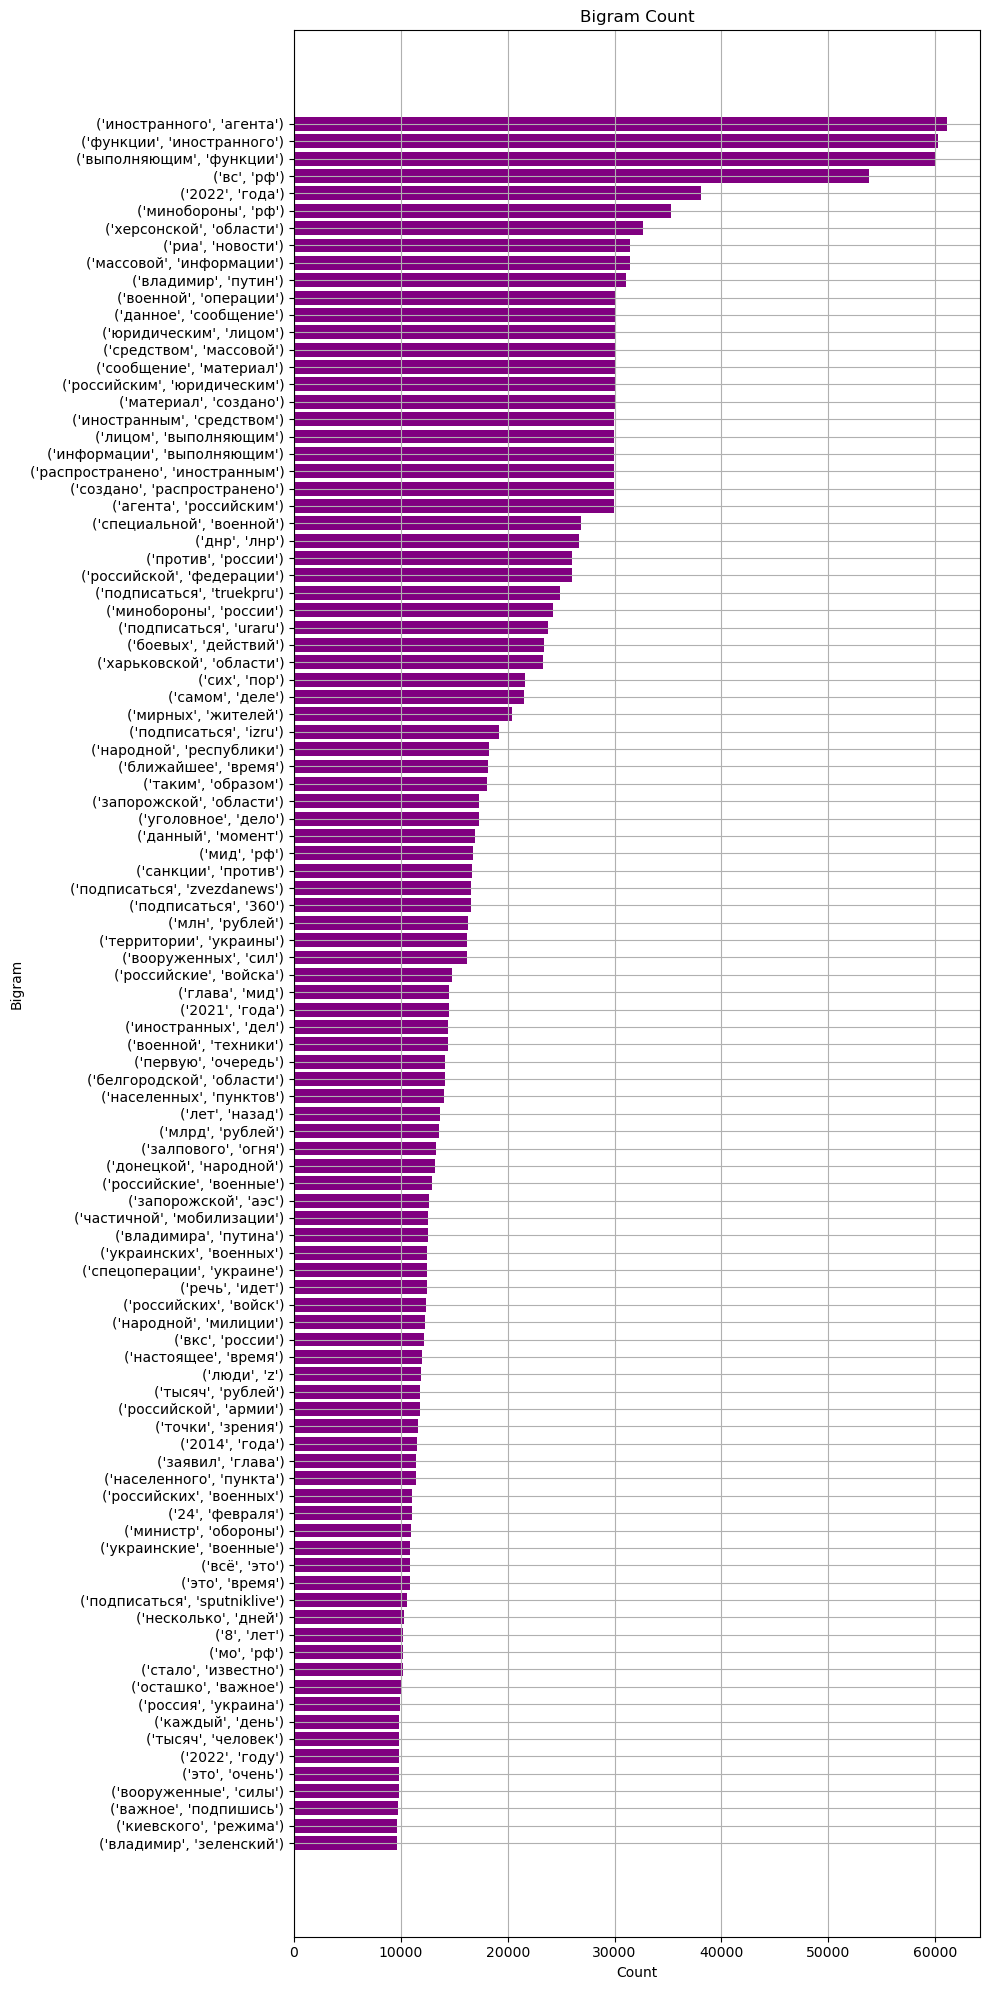

In [70]:
plt.figure(figsize=(10, 20))
plt.barh(merged_bigrams_first_100['bigram'].astype(str), merged_bigrams_first_100['count'], color='purple')
plt.ylabel('Bigram')
plt.xlabel('Count')
plt.title('Bigram Count')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.grid(True)

# Show the plot
plt.show()

## 3-gram analysis

In [71]:
def text_to_trigrams(text):
    # Split text into words
    words = text.split()

    # Generate trigrams and store them in a list
    trigrams = []
    for token1, token2, token3 in nltk.ngrams(words, 3):
        trigrams.append((token1, token2, token3))

    # Return the list of trigrams
    return trigrams

In [72]:
slices_threegrams = []
for sl in slices:
    sl = pd.DataFrame(sl)
    # Remove punctuation
    sl['message'] = sl['message'].astype(str).apply(lambda x: re.sub(r'[^\w\s]', '', x))
    # Convert text to lowercase
    sl['message'] = sl['message'].astype(str).apply(lambda x: x.lower())
    # Remove stop words
    sl['message'] = sl['message'].apply(remove_stopwords)
    # Create a new column to store bigrams
    sl['threegrams'] = sl['message'].apply(text_to_trigrams)
    # Flatten the list of bigrams and count occurrences
    flat_threegrams = [threegram for sublist in sl['threegrams'] for threegram in sublist]
    threegram_counts = Counter(flat_threegrams)
    # Create a DataFrame with 'bigram' and 'count'
    slices_threegrams.append(pd.DataFrame({'threegram': list(threegram_counts.keys()), 'count': list(threegram_counts.values())}))

In [73]:
for i in range(len(slices_threegrams)):
    slices_threegrams[i] = slices_threegrams[i].sort_values(by='count',ascending=False)
    slices_threegrams[i] = pd.DataFrame(slices_threegrams[i].head(50000))
    print(sl.head(5))

        Unnamed: 0       id                      date     views  \
7081833       7243  18123.0 2022-04-30 16:46:34+00:00   79647.0   
7081834       7244  18122.0 2022-04-30 16:34:16+00:00  662527.0   
7081835       7245  18121.0 2022-04-30 16:30:54+00:00   60425.0   
7081836       7246  18120.0 2022-04-30 16:14:42+00:00   71152.0   
7081837       7247  18119.0 2022-04-30 15:39:11+00:00   69170.0   

                                                 reactions  \
7081833  MessageReactions(results=[ReactionCount(reacti...   
7081834  MessageReactions(results=[ReactionCount(reacti...   
7081835  MessageReactions(results=[ReactionCount(reacti...   
7081836  MessageReactions(results=[ReactionCount(reacti...   
7081837  MessageReactions(results=[ReactionCount(reacti...   

                                      to_id  \
7081833  PeerChannel(channel_id=1134659841)   
7081834  PeerChannel(channel_id=1134659841)   
7081835  PeerChannel(channel_id=1134659841)   
7081836  PeerChannel(channel_id=1134

        Unnamed: 0       id                      date     views  \
7081833       7243  18123.0 2022-04-30 16:46:34+00:00   79647.0   
7081834       7244  18122.0 2022-04-30 16:34:16+00:00  662527.0   
7081835       7245  18121.0 2022-04-30 16:30:54+00:00   60425.0   
7081836       7246  18120.0 2022-04-30 16:14:42+00:00   71152.0   
7081837       7247  18119.0 2022-04-30 15:39:11+00:00   69170.0   

                                                 reactions  \
7081833  MessageReactions(results=[ReactionCount(reacti...   
7081834  MessageReactions(results=[ReactionCount(reacti...   
7081835  MessageReactions(results=[ReactionCount(reacti...   
7081836  MessageReactions(results=[ReactionCount(reacti...   
7081837  MessageReactions(results=[ReactionCount(reacti...   

                                      to_id  \
7081833  PeerChannel(channel_id=1134659841)   
7081834  PeerChannel(channel_id=1134659841)   
7081835  PeerChannel(channel_id=1134659841)   
7081836  PeerChannel(channel_id=1134

        Unnamed: 0       id                      date     views  \
7081833       7243  18123.0 2022-04-30 16:46:34+00:00   79647.0   
7081834       7244  18122.0 2022-04-30 16:34:16+00:00  662527.0   
7081835       7245  18121.0 2022-04-30 16:30:54+00:00   60425.0   
7081836       7246  18120.0 2022-04-30 16:14:42+00:00   71152.0   
7081837       7247  18119.0 2022-04-30 15:39:11+00:00   69170.0   

                                                 reactions  \
7081833  MessageReactions(results=[ReactionCount(reacti...   
7081834  MessageReactions(results=[ReactionCount(reacti...   
7081835  MessageReactions(results=[ReactionCount(reacti...   
7081836  MessageReactions(results=[ReactionCount(reacti...   
7081837  MessageReactions(results=[ReactionCount(reacti...   

                                      to_id  \
7081833  PeerChannel(channel_id=1134659841)   
7081834  PeerChannel(channel_id=1134659841)   
7081835  PeerChannel(channel_id=1134659841)   
7081836  PeerChannel(channel_id=1134

In [74]:
merged_threegrams = pd.DataFrame(slices_threegrams[0])
for i, sl in enumerate(slices_threegrams):
    if i != 0: 
        merged_threegrams = pd.concat([merged_threegrams, sl], ignore_index=True)
        merged_threegrams = merged_threegrams.groupby('threegram')['count'].sum().reset_index()

In [75]:
len(merged_threegrams)

234975

In [76]:
merged_threegrams = merged_threegrams.sort_values(by='count',ascending=False)

In [77]:
merged_threegrams_100 = pd.DataFrame(merged_threegrams.head(100))
merged_threegrams_100 = merged_threegrams_100.sort_values(by='count')

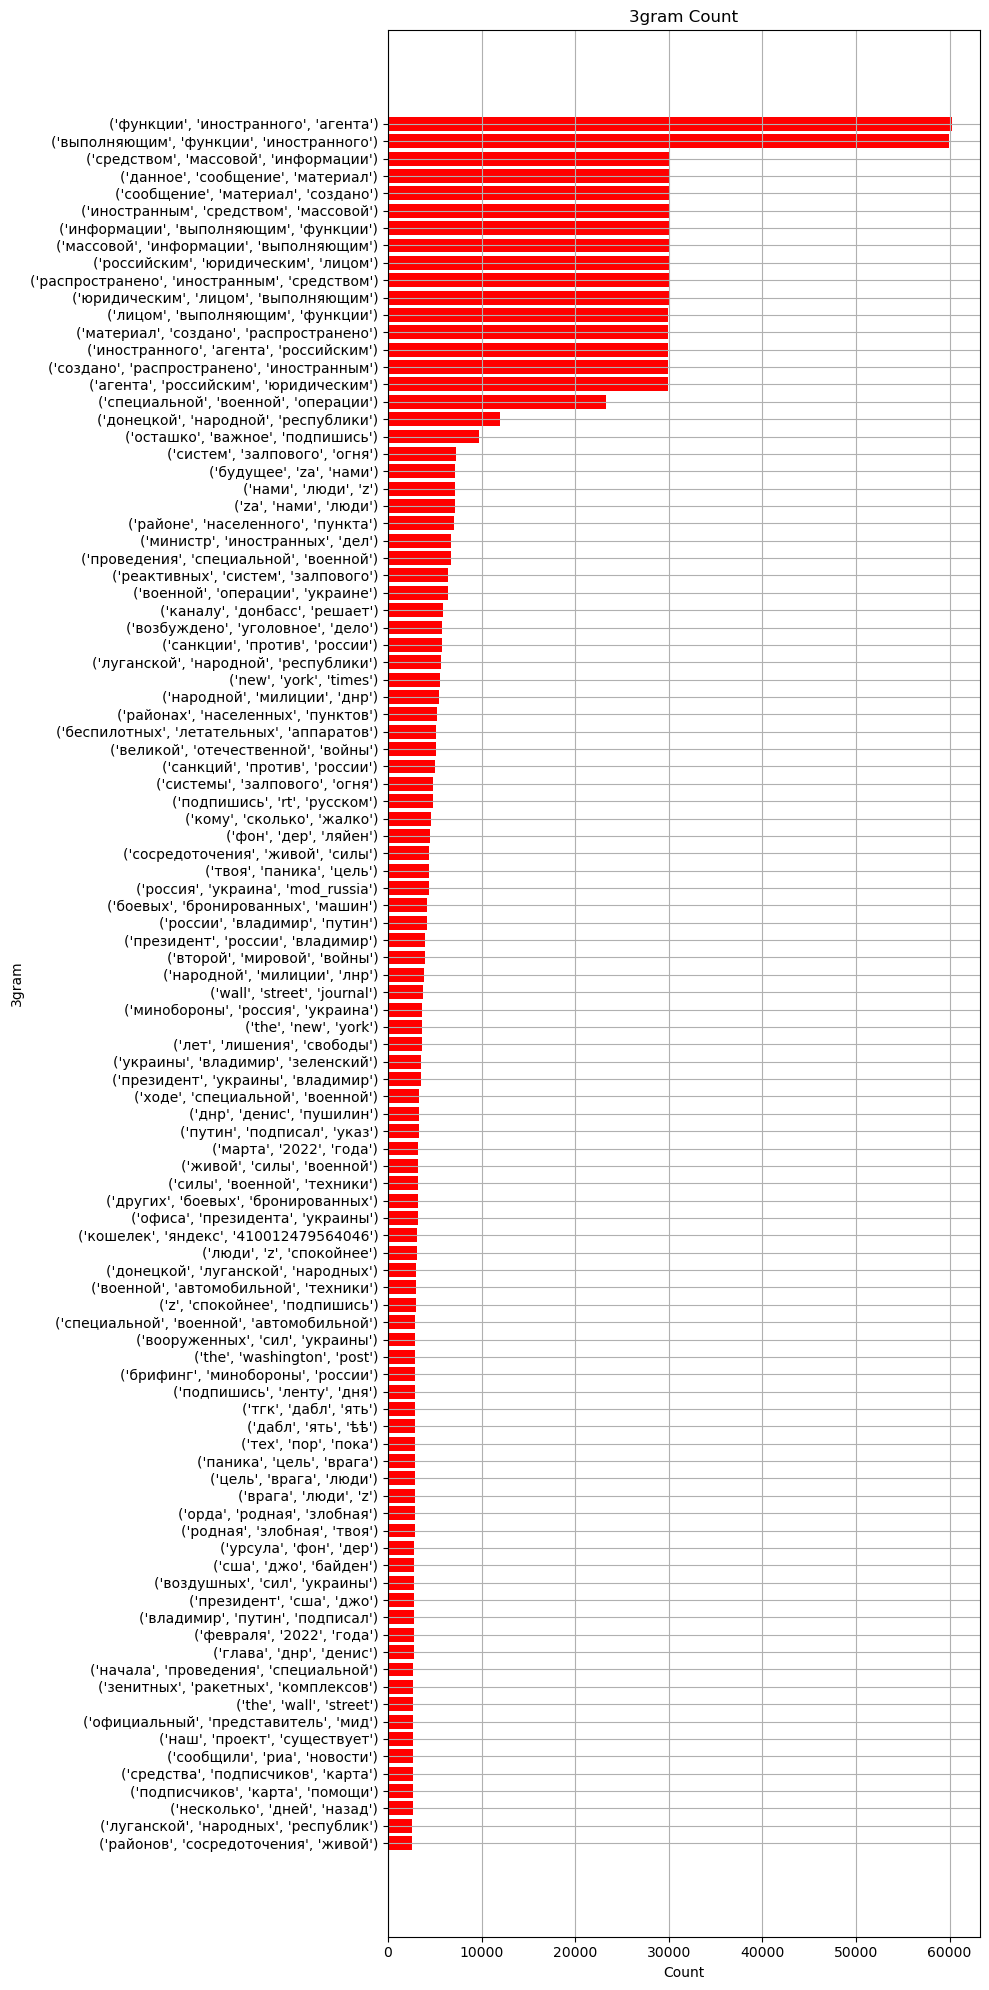

In [78]:
plt.figure(figsize=(10, 20))
plt.barh(merged_threegrams_100['threegram'].astype(str), merged_threegrams_100['count'], color='red')
plt.ylabel('3gram')
plt.xlabel('Count')
plt.title('3gram Count')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.grid(True)

# Show the plot
plt.show()